In [23]:
import pandas as pd

df = pd.read_excel(r'data/processed/Professional_Tourism_Dataset.xlsx')
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'Contenent', 'ContenentId', 'RegionId', 'Region', 'CountryId_x',
       'CountryId_y', 'CityName', 'CityId_x', 'CityId_y', 'Attraction',
       'AttractionId', 'AttractionAddress', 'AttractionType',
       'AttractionTypeId', 'AttractionCityId', 'ContentId', 'Rating'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      52930 non-null  int64 
 1   UserId             52930 non-null  int64 
 2   VisitYear          52930 non-null  int64 
 3   VisitMonth         52930 non-null  int64 
 4   VisitMode          52930 non-null  int64 
 5   Contenent          52930 non-null  object
 6   ContenentId        52930 non-null  int64 
 7   RegionId           52930 non-null  int64 
 8   Region             52930 non-null  object
 9   CountryId_x        52930 non-null  int64 
 10  CountryId_y        52930 non-null  int64 
 11  CityName           52930 non-null  object
 12  CityId_x           52930 non-null  int64 
 13  CityId_y           52930 non-null  int64 
 14  Attraction         52930 non-null  object
 15  AttractionId       52930 non-null  int64 
 16  AttractionAddress  52930 non-null  objec

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle

In [26]:
label_encoders = {}
for column in ['Contenent', 'Region', 'CityName', 'Attraction', 'AttractionAddress', 'AttractionType']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [27]:
# Split data into features and target
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
# Initialize lists to store AUC and accuracy values
auc_scores = {}
accuracy_scores = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"Classification Report and Accuracy for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}\n")

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if len(y_prob[0]) == 2:  # Binary classification
            auc_scores[name] = roc_auc_score(y_test, y_prob[:, 1])
        else:  # Multiclass classification (one-vs-rest)
            y_onehot = pd.get_dummies(y_test)
            auc_scores[name] = roc_auc_score(y_onehot, y_prob, average='weighted', multi_class='ovr')

Classification Report and Accuracy for Random Forest:
              precision    recall  f1-score   support

           1       0.37      0.19      0.25       257
           2       0.21      0.07      0.10       409
           3       0.30      0.19      0.23      1509
           4       0.40      0.38      0.39      3632
           5       0.54      0.67      0.60      4779

    accuracy                           0.47     10586
   macro avg       0.36      0.30      0.31     10586
weighted avg       0.44      0.47      0.45     10586

Accuracy: 0.47

Classification Report and Accuracy for Decision Tree:
              precision    recall  f1-score   support

           1       0.19      0.19      0.19       257
           2       0.10      0.10      0.10       409
           3       0.21      0.23      0.22      1509
           4       0.38      0.37      0.38      3632
           5       0.53      0.52      0.53      4779

    accuracy                           0.41     10586
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Classification Report and Accuracy for Logistic Regression:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       257
           2       0.00      0.00      0.00       409
           3       0.00      0.00      0.00      1509
           4       0.33      0.14      0.20      3632
           5       0.47      0.88      0.61      4779

    accuracy                           0.45     10586
   macro avg       0.16      0.20      0.16     10586
weighted avg       0.32      0.45      0.34     10586

Accuracy: 0.45

Classification Report and Accuracy for Gradient Boosting:
              precision    recall  f1-score   support

           1       0.37      0.16      0.22       257
           2       0.27      0.01      0.01       409
           3       0.31      0.03      0.05      1509
           4       0.38      0.27      0.32      3632
           5       0.50      0.82      0.62      4779

    accuracy                           0.47     105

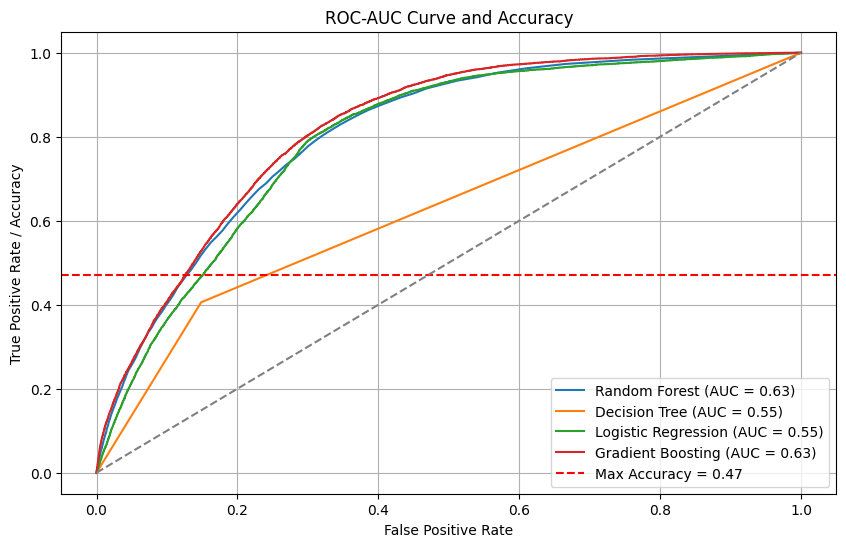

In [ ]:
# Plot ROC-AUC curve and accuracy for models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if len(y_prob[0]) == 2:  # Binary classification
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_scores[name]:.2f})")
        else:  # Multiclass classification (one-vs-rest)
            y_onehot = pd.get_dummies(y_test)
            fpr, tpr, _ = roc_curve(y_onehot.values.ravel(), y_prob.ravel())
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_scores[name]:.2f})")

# Plot accuracy
plt.axhline(y=max(accuracy_scores.values()), color='r', linestyle='--', label=f"Max Accuracy = {max(accuracy_scores.values()):.2f}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate / Accuracy')
plt.title('ROC-AUC Curve and Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save trained models
for name, model in models.items():
    with open(f"models/{name}_model.pkl", "wb") as f:
        pickle.dump(model, f)

# **Prediction**

In [5]:
# Function to load the selected model
def load_model(model_name):
    if model_name in models:
        with open(f"models/{model_name.replace(' ', '_')}_model.pkl", "rb") as file:
            model = pickle.load(file)
        return model
    else:
        print(f"Model {model_name} not found.")
        return None

In [21]:
# Get user input
def get_user_input():
    print("Please enter the following details or press Enter to use the default value:")
    user_input = {
        'TransactionId': input("Enter TransactionId (default: 0): ") or 0,
        'UserId': input("Enter UserId (default: 0): ") or 0,
        'VisitYear': input("Enter VisitYear (default: 2023): ") or 2023,
        'VisitMonth': input("Enter VisitMonth (default: 6): ") or 6,
        'VisitMode': input("Enter VisitMode (default: 1): ") or 1,
        'Contenent': input("Enter Contenent (default: 0): ") or 0,
        'ContenentId': input("Enter ContenentId (default: 1): ") or 1,
        'Region': input("Enter Region (default: 0): ") or 0,
        'RegionId': input("Enter RegionId (default: 10): ") or 10,
        'CountryId_x': input("Enter CountryId_x (default: 100): ") or 100,
        'CountryId_y': input("Enter CountryId_y (default: 100): ") or 100,
        'CityName': input("Enter CityName (default: 0): ") or 0,
        'CityId_x': input("Enter CityId_x (default: 1000): ") or 1000,
        'CityId_y': input("Enter CityId_y (default: 1000): ") or 1000,
        'Attraction': input("Enter Attraction (default: 0): ") or 0,
        'AttractionId': input("Enter AttractionId (default: 5000): ") or 5000,
        'AttractionAddress': input("Enter AttractionAddress (default: 0): ") or 0,
        'AttractionType': input("Enter AttractionType (default: 0): ") or 0,
        'AttractionTypeId': input("Enter AttractionTypeId (default: 2): ") or 2,
        'AttractionCityId': input("Enter AttractionCityId (default: 1000): ") or 1000,
        'ContentId': input("Enter ContentId (default: 2000): ") or 2000,
    }
    user_input = {k: float(v) for k, v in user_input.items()}
    return pd.DataFrame([user_input])

In [19]:
# Main function to load model and make prediction
def main():
    print("Available models:")
    for model_name in models.keys():
        print(model_name)

    selected_model = input("Select a model from the above list: ")
    model = load_model(selected_model)

    if model:
        user_features = get_user_input()
        # Ensure that user_features columns match the trained model's columns
        user_features = user_features[X.columns]
        prediction = model.predict(user_features)
        print(f"Recommended rating: {prediction[0]}")

In [28]:
if __name__ == "__main__":
    main()

Available models:
Random Forest
Decision Tree
Logistic Regression
Gradient Boosting
Select a model from the above list: Logistic Regression
Please enter the following details or press Enter to use the default value:
Enter TransactionId (default: 0): 
Enter UserId (default: 0): 
Enter VisitYear (default: 2023): 
Enter VisitMonth (default: 6): 
Enter VisitMode (default: 1): 
Enter Contenent (default: 0): 
Enter ContenentId (default: 1): 
Enter Region (default: 0): 
Enter RegionId (default: 10): 
Enter CountryId_x (default: 100): 
Enter CountryId_y (default: 100): 
Enter CityName (default: 0): 
Enter CityId_x (default: 1000): 
Enter CityId_y (default: 1000): 
Enter Attraction (default: 0): 
Enter AttractionId (default: 5000): 
Enter AttractionAddress (default: 0): 
Enter AttractionType (default: 0): 
Enter AttractionTypeId (default: 2): 
Enter AttractionCityId (default: 1000): 
Enter ContentId (default: 2000): 
Recommended rating: 5
